<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/5039/logos/front_page.png">

Оригинальное соревнование: https://www.kaggle.com/c/shelter-animal-outcomes

In [5]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [6]:
pd.read_csv('train.csv') 

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


## Задание:

1) Заполните пропуски. Для "древесных" алгоритмов, как правило, пропуски заполняются несуществующими значениями, которые далеко отстоят от реальных значений.

2) Категориальные признаки преобразуйте с помощью pd.get_dummies , а лучше его аналогом  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> . Придумайте, что можно сделать с тем случаем, когда get_dummies создает слишком много колонок.

2) Поставьте n_estimators=200 и найдите ту комбинацию признаков в датасете, которая дает лучший результат.

3) С помощью feature\_importances\_  оцените, какие признаки были самыми важными в классификации

4) Постройте зависимость oob\_score\_ относительно количества деревьев в лесе и выберете оптимальное значение n_estimators

5) Померьте качество RF на кросс-валидации: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a> на 5-ти фолдах. Отличается ли среднее значение от oob\_score\_?

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [9]:
df['SexuponOutcome'].value_counts(normalize=True, dropna=False)

Neutered Male    0.365857
Spayed Female    0.329979
Intact Male      0.131879
Intact Female    0.131355
Unknown          0.040892
NaN              0.000037
Name: SexuponOutcome, dtype: float64

In [10]:
df['SexuponOutcomeNoNan'] = df['SexuponOutcome'].fillna('Neutered Male')

In [11]:
df['SexuponOutcomeNoNan'] = \
    df['SexuponOutcomeNoNan'].replace({'Unknown': 'Neutered Male'})

In [12]:
df['SexuponOutcomeNoNan'].value_counts(normalize=True, dropna=False)

Neutered Male    0.406787
Spayed Female    0.329979
Intact Male      0.131879
Intact Female    0.131355
Name: SexuponOutcomeNoNan, dtype: float64

In [14]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': 
        return np.nan
    age = int(x.split()[0]) 
    if 'year' in x: 
        return age 
    if 'month' in x: 
        return age / 12.
    if 'week' in x: 
        return age / 52.
    if 'day' in x: 
        return age / 365.25
    else:
        raise 'Unknown format'

In [15]:
df['AgeuponOutcomeNoNan'] = df['AgeuponOutcome'].map(calc_age_in_years)

In [16]:
df['AgeuponOutcomeNoNan'] = \
    df['AgeuponOutcomeNoNan'].fillna(np.mean(df['AgeuponOutcomeNoNan']))

In [17]:
df['DoesNotHaveName'] = df['Name'].isnull()

In [18]:
df['NameNoNan'] = df['Name'].replace({np.nan: 'Unknown'})

In [19]:
df['AgeuponOutcomeNoNan'].mean()

2.1772438474448013

In [20]:
df['Sex'] = df['SexuponOutcomeNoNan'].map(lambda x: 'Male' in x)

In [21]:
df['Sex'] = df['SexuponOutcomeNoNan'].map({'Neutered Male': 1,
                                           'Intact Male': 1,
                                           'Spayed Female': 0,
                                           'Intact Female': 0})

In [22]:
df['Intact'] = df['SexuponOutcomeNoNan'].map({'Neutered Male': 0,
                                           'Intact Male': 1,
                                           'Spayed Female': 0,
                                           'Intact Female': 1})

In [23]:
df['Mix'] = df['Breed'].map(
    lambda x: 'mix' in x.lower() or '/' in x)

In [24]:
breed_counts = dict(df['Breed'].value_counts(normalize=True))

In [25]:
df['BreedFreq'] = df['Breed'].map(breed_counts)

In [26]:
df['AnimalTypeBool'] = df['AnimalType'].map({'Dog': 1, 'Cat': 0})

In [27]:
df['datetime'] = pd.to_datetime(df['DateTime'])

df['feat_year'] = df['datetime'].map(lambda x: x.year)
df['feat_month'] = df['datetime'].map(lambda x: x.month)
df['feat_day'] = df['datetime'].map(lambda x: x.day)
df['feat_hour'] = df['datetime'].map(lambda x: x.hour)
df['feat_minute'] = df['datetime'].map(lambda x: x.minute)
df['feat_weekday'] = df['datetime'].map(lambda x: x.weekday())

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df_clean = df[['AgeuponOutcomeNoNan', 
               'DoesNotHaveName',
               'Sex',
               'Intact',
               'Mix', 
               'BreedFreq',
               'AnimalTypeBool',
               'feat_year',
               'feat_month',
               'feat_day',
               'feat_hour', 
               'feat_minute',
               'feat_weekday'
              ]]

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, 
                            oob_score=True, 
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)

In [31]:
rf.fit(df_clean, df['OutcomeType'])
rf.oob_score_

0.7007370271989225

In [33]:
oob_scores = []
for n_estimators in np.arange(200, 1501, 50):
    print(n_estimators)
    rf.set_params(n_estimators=n_estimators)
    rf.fit(df_clean, df['OutcomeType'])
    oob_scores.append(rf.oob_score_)

200


/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500


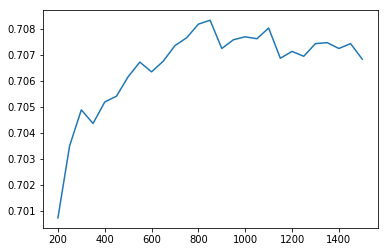

In [35]:
from matplotlib import pyplot as plt
plt.plot(np.arange(200, 1501, 50), oob_scores)

In [36]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators=850, 
                            random_state=42,
                            n_jobs=-1)

grid_search = GridSearchCV(rf, 
                           {'criterion': ['gini', 'entropy'],
                            'max_depth': [4, 7, 10, None],
                            'max_features': ['log2', 'sqrt', None]},
                           cv=kfold,
                           verbose=2)
grid_search.fit(df_clean, df['OutcomeType'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=4, max_features=log2 ..................
[CV] ... criterion=gini, max_depth=4, max_features=log2, total=   2.8s
[CV] criterion=gini, max_depth=4, max_features=log2 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ... criterion=gini, max_depth=4, max_features=log2, total=   3.2s
[CV] criterion=gini, max_depth=4, max_features=log2 ..................
[CV] ... criterion=gini, max_depth=4, max_features=log2, total=   2.8s
[CV] criterion=gini, max_depth=4, max_features=log2 ..................
[CV] ... criterion=gini, max_depth=4, max_features=log2, total=   3.1s
[CV] criterion=gini, max_depth=4, max_features=log2 ..................
[CV] ... criterion=gini, max_depth=4, max_features=log2, total=   2.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   2.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   3.2s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   2.7s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] .

[CV]  criterion=gini, max_depth=None, max_features=None, total=  18.1s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, total=   2.7s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, total=   3.1s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, total=   3.4s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, total=   3.8s
[CV] criterion=entropy, max_depth=4, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, total=   2.7s
[CV] criterion=entropy, max_depth=4, max_features=sqrt ...............
[CV]  

[CV]  criterion=entropy, max_depth=None, max_features=None, total=  22.4s
[CV] criterion=entropy, max_depth=None, max_features=None ............
[CV]  criterion=entropy, max_depth=None, max_features=None, total=  22.7s
[CV] criterion=entropy, max_depth=None, max_features=None ............
[CV]  criterion=entropy, max_depth=None, max_features=None, total=  20.3s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 16.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=850, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 7, 10, None], 'max_features': ['log2', 'sqrt', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [39]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2'}

In [44]:
grid_search.grid_scores_

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.61686, std: 0.00416, params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'},
 mean: 0.61686, std: 0.00416, params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'},
 mean: 0.63190, std: 0.00630, params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None},
 mean: 0.66026, std: 0.00590, params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'},
 mean: 0.66026, std: 0.00590, params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'},
 mean: 0.67335, std: 0.00748, params: {'criterion': 'gini', 'max_depth': 7, 'max_features': None},
 mean: 0.68046, std: 0.00579, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'},
 mean: 0.68046, std: 0.00579, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'},
 mean: 0.68413, std: 0.00511, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': None},
 mean: 0.70265, std: 0.00548, params: {'criterion': 'gini', 'max_depth': None, 'max_features':

### RandomizedSearch

In [46]:
from sklearn.model_selection import RandomizedSearchCV
randomize_search = RandomizedSearchCV(rf,
                           {'criterion': ['gini', 'entropy'],
                            'max_depth': [4, 7, 10, None],
                            'max_features': ['log2', 'sqrt', None]},
                           cv=kfold,
                           verbose=2)
randomize_search.fit(df_clean, df['OutcomeType'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=sqrt, max_depth=10, criterion=entropy ..............
[CV]  max_features=sqrt, max_depth=10, criterion=entropy, total=   4.7s
[CV] max_features=sqrt, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_features=sqrt, max_depth=10, criterion=entropy, total=   4.7s
[CV] max_features=sqrt, max_depth=10, criterion=entropy ..............
[CV]  max_features=sqrt, max_depth=10, criterion=entropy, total=   5.5s
[CV] max_features=sqrt, max_depth=10, criterion=entropy ..............
[CV]  max_features=sqrt, max_depth=10, criterion=entropy, total=   5.4s
[CV] max_features=sqrt, max_depth=10, criterion=entropy ..............
[CV]  max_features=sqrt, max_depth=10, criterion=entropy, total=   6.5s
[CV] max_features=sqrt, max_depth=10, criterion=gini .................
[CV] .. max_features=sqrt, max_depth=10, criterion=gini, total=   4.5s
[CV] max_features=sqrt, max_depth=10, criterion=gini .................
[CV] .. max_features=sqrt, max_depth=10, criterion=gini, total=   4.4s
[CV] max_features=sqrt, max_depth=10, criterion=gini .................
[CV] .. max_features=sqrt, max_depth=10, criterion=gini, total=   4.5s
[CV] max_features=sqrt, max_depth=10, criterion=gini .................
[C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=850, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [4, 7, 10, None], 'max_features': ['log2', 'sqrt', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [48]:
randomize_search.grid_scores_

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68121, std: 0.00664, params: {'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'},
 mean: 0.68046, std: 0.00579, params: {'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'},
 mean: 0.70119, std: 0.00422, params: {'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'},
 mean: 0.70265, std: 0.00548, params: {'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'},
 mean: 0.66026, std: 0.00590, params: {'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini'},
 mean: 0.67335, std: 0.00748, params: {'max_features': None, 'max_depth': 7, 'criterion': 'gini'},
 mean: 0.66026, std: 0.00590, params: {'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini'},
 mean: 0.61439, std: 0.00519, params: {'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.61686, std: 0.00416, params: {'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.65790, std: 0.00509, params: {'max_features': 'log2', 'max_depth': 

## hyperopt
https://github.com/hyperopt/hyperopt-sklearn

git clone git@github.com:hyperopt/hyperopt-sklearn.git

(cd hyperopt-sklearn && pip install -e .)

Статья: http://blog.districtdatalabs.com/parameter-tuning-with-hyperopt

Видео: https://www.youtube.com/watch?v=Mp1xnPfE4PY

### Закодируем Breed таргетом:

In [62]:
def mean_target(df, feature_name, target_name, C=None):
    """Mean target.
    Original idea: Stanislav Semenov
    Parameters
    ----------
    C : float, default None
        Regularization coefficient. The higher, the more conservative result.
        The optimal value lies between 10 and 50 depending on the data.
    feature_name : str
    target_name : str
    df: DataFrame
    Returns
    -------
    Series
    """

    def group_mean(group):
        group_size = float(group.shape[0])
        if C is None:
            return (group.mean() * group_size + global_mean) / group_size
        else:
            return (group.mean() * group_size + global_mean * C) / (group_size + C)

    global_mean = df[target_name].mean()
    return df.groupby(feature_name)[target_name].transform(group_mean)

In [69]:
df['Return_to_owner'] = df['OutcomeType'] == 'Return_to_owner'

In [71]:
### продолжение в классе

## Нагенерим новых фичей:

In [75]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [77]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [81]:
poly = PolynomialFeatures(interaction_only=True, degree=3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

In [106]:
from sklearn.preprocessing import PolynomialFeatures
p_features = PolynomialFeatures(2, include_bias=False)
new_features = p_features.fit_transform(df_clean)[:,:p_features.n_input_features_:]

In [111]:
new_features = pd.DataFrame(new_features, columns=['new_f_' + str(x) for x in range(new_features.shape[1])])
new_clean_df = pd.concat([df_clean, new_features], axis=1)

In [112]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf, new_clean_df, df['OutcomeType'], cv=kfold)

array([ 0.69446522,  0.70974378,  0.70383536,  0.70402245,  0.70583832])

In [113]:
np.mean(array([ 0.69446522,  0.70974378,  0.70383536,  0.70402245,  0.70583832]))

0.70358102599999994

In [116]:
rf.fit(new_clean_df, df['OutcomeType'])

array([ 0.08635483,  0.02463357,  0.01021268,  0.05055189,  0.00349975,
        0.04449381,  0.01072261,  0.01931179,  0.04055958,  0.05388898,
        0.05624548,  0.06679004,  0.03367633,  0.08666547,  0.02488755,
        0.01024301,  0.04746875,  0.0034995 ,  0.04479579,  0.01131897,
        0.01924761,  0.04056928,  0.05391903,  0.05590417,  0.0668905 ,
        0.03364906])

In [122]:
def get_feature_importance(df, rf):
    for feature, importance in sorted(zip(df.columns, rf.feature_importances_), key=lambda x: -x[1]):
        print(feature, '\t', importance)
    
get_feature_importance(new_clean_df, rf)

new_f_0 	 0.0866654661801
AgeuponOutcomeNoNan 	 0.0863548269252
new_f_11 	 0.0668904994404
feat_minute 	 0.0667900382983
feat_hour 	 0.0562454758307
new_f_10 	 0.055904166193
new_f_9 	 0.0539190285368
feat_day 	 0.0538889793445
Intact 	 0.0505518886287
new_f_3 	 0.0474687483228
new_f_5 	 0.0447957891079
BreedFreq 	 0.0444938072583
new_f_8 	 0.0405692795673
feat_month 	 0.0405595775348
feat_weekday 	 0.0336763325007
new_f_12 	 0.0336490580602
new_f_1 	 0.0248875486132
DoesNotHaveName 	 0.0246335713522
feat_year 	 0.0193117937949
new_f_7 	 0.0192476064919
new_f_6 	 0.011318971277
AnimalTypeBool 	 0.0107226084551
new_f_2 	 0.0102430112694
Sex 	 0.0102126811759
Mix 	 0.00349974570373
new_f_4 	 0.00349950013699


#### Продолжение задания для kNN:

6) Попробуйте использовать kNN с параметрами по умолчанию. Чтобы померить качество, можно использовать <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a> на 5-ти фолдах.

7) Для kNN пропуски нужно заполять чем-то близким к реальности: например, средним значением параметра. Это можно сделать с помощью класса <a href="http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values">Imputer</a>. Проверьте, на сколько отличается качество при использовании такого подхода к заполнению признаков.

8) Еще kNN любит, чтобы признаки имели схожий масштаб. Помните, мы вычитали среднее и делили на std массив? Так вот для это есть отдельный класс: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler">sklearn.preprocessing.StandardScaler</a>. Примените шкалирование. Удалось ли улучшить качество?

9) Пройдитесь GridSearch-ем по параметрам kNN (количество соседей, параметр p у метрики Минковского). Какое количество соседей оказалось оптимальным? Какая метрика расстояния?

10) Скорее всего результат kNN получился не таким хорошим как у RF. Все не зря! С помощью <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html"> sklearn.model_selection.StratifiedKFold</a> можно сгенерировать трейн- и тестовые выборки. Давайте обучимся на трейне и предскажем для теста. StratifiedKFold отдает индексы элементов из X, которые попадут в тестовую выборку. Давайте создадим колонку размера len(X), где будем хранить предсказания kNN по соответствующим индексам. Таким образом мы создадим несмещенные оценки алгоритма, а значит, будем иметь полное право использовать их как входные данные для RF. Попробуйте улучшить результат RF за счет колонки предсказаний kNN. 

#### Идеи по улучшению скора:

- Придумывайте новые признаки! <br>
Важно ли слово mix в породе? <br>
Сколько слов используется в названии породы? <br>
Можно ли как-то преобразовать timestamp? Например, вытащить из него день недели, или год?<br>
Будьте осторожны, ведь признаки могут не только улучшать score. <br>
Некоторые признаки хорошо работают только в паре.


- Подбирайте гипер-параметры модели.<br>Какой критерий использовать gini или entropy?<br>Может, стоит не до конца строить деревья?